<a href="https://colab.research.google.com/github/m-mahbub007/Course_MSE7530/blob/main/Assignment1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1

Instructions: Please work through this notebook. Anything in <font color='red'> red </font> requires an answer in a code and/or text cell, as indicated. Please leave all of the text I have written; I have arranged the notebook so that I can easily navigate to your answers and skip my own explanations.

## Part 1 : Accessing a Database & Plotting Results

### Python Practice : for loops
https://www.w3schools.com/python/python_for_loops.asp  
We will talk more about loops in detail, but for now, we will learn by doing. A for loop will do just that: for every "thing" in a list/string/etc., the code will do something.


#### Explanations

In [1]:
for x in [1., 6., 7.]:
  print(x*3)

3.0
18.0
21.0


This can be done for many different data types. For example, we can have a list full of strings instead and do the same thing.

In [2]:
for l in ['OFET', 'OLED', 'OMIEC']:
  print(l)
print('Alternatively,')
for w in 'OFET':
  print(w)

OFET
OLED
OMIEC
Alternatively,
O
F
E
T


Something useful that we can use (not quite related) are "f-strings". These provide a convenient way to insert strings, integers, or floats, etc. into existing strings. This can be helpful to add a little more context. Take our previous example,

In [3]:
for x in [1., 6., 7.]:
  multiplier = 3
  print(f'The value of x ({x}) multiplied by {multiplier} is {x*3}')

The value of x (1.0) multiplied by 3 is 3.0
The value of x (6.0) multiplied by 3 is 18.0
The value of x (7.0) multiplied by 3 is 21.0


We can use that to make complete strings, as well. For example, (HINT), if we have a dictionary (again, more on these later) which uses strings to access values

In [5]:
mw_dict = {'benzene' :78.11 , 'toluene' : 92.141 , 'propane' : 44.097} # makes a bunch of key/value pairs, which we can reference
desired = 'toluene'
print(f'The molecular weight of {desired} is {mw_dict[desired]}')

The molecular weight of toluene is 92.141


In [6]:
key_list = mw_dict.keys()
print(key_list)

dict_keys(['benzene', 'toluene', 'propane'])


In [7]:
for k in key_list:
  print(f'The molecular weight of {k} is {mw_dict[k]}')

The molecular weight of benzene is 78.11
The molecular weight of toluene is 92.141
The molecular weight of propane is 44.097


#### <font color = 'red'> Practice: write a for loop that:</font>  
Converts the following values of energy in eV to J and prints them out. The conversion factor between the two energy units is $1 eV = 1.602 \times 10^{-19} J$.

In [32]:
energies = [100., 1230., 2000., 3600.]
for energies1 in energies:
  #print(energies)
  print(f' {energies1} eV = {energies1*1.602e-19} J')

 100.0 eV = 1.602e-17 J
 1230.0 eV = 1.97046e-16 J
 2000.0 eV = 3.204e-16 J
 3600.0 eV = 5.7672e-16 J


### NIST WebBook

#### Similarly to what we did in class: <font color = 'red'> Compare the IR and UV-vis spectra for 3 different series of molecules by loading the data, plotting on a common axis (or axes) that facilitates comparison, and qualitatively explaining any trends you see with each series.

##### <font color = 'red'> Series 1: ethane, ethylene, ethyne (acetylene) </font>

In [33]:
! pip install nistchempy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 29.1 MB/s eta 0:00:00


In [34]:
import nistchempy as nist
import numpy as np
import matplotlib.pyplot as plt

In [60]:
search_results = nist.run_search(identifier = ['ethane','ethylene','acetylene'], search_type = 'name')
search_results

NistSearch(success=True, num_compounds=1, lost=False)

In [61]:
search_results.compound_ids

['C74840']

In [38]:
dir(search_results)

['__annotations__',
 '__class__',
 '__dataclass_fields__',
 '__dataclass_params__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__match_args__',
 '__module__',
 '__ne__',
 '__new__',
 '__post_init__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_nist_response',
 '_request_config',
 '_save_response_page',
 'compound_ids',
 'compounds',
 'load_found_compounds',
 'lost',
 'num_compounds',
 'search_parameters',
 'success']

In [39]:
X = search_results.compounds[0]
X


NistCompound(ID=C74840)

In [35]:
! pip install jcamp
import jcamp as jc

INFO: pip is looking at multiple versions of jcamp to determine which version is compatible with other requirements. This could take a while.
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.7/264.7 kB 20.6 MB/s eta 0:00:00
  Created wheel for jcamp: filename=jcamp-1.2.2-py2.py3-none-any.whl size=10652 sha256=d50199836af36e12506d9e297b2aa4613e5be53419c2d59fe3619ad0716f93e5
  Stored in directory: /root/.cache/pip/wheels/6a/d1/9f/9599e61ea4096b380977b3e343d144d1705615c3608f9c034d
Successfully built jcamp


In [40]:
X.get_ir_spectra()
X.ir_specs

[Spectrum(C74840, IR spectrum #0), Spectrum(C74840, IR spectrum #1)]

In [53]:
X.get_uv_spectra()
X.uv_specs

[]

In [41]:
import os

# Create a directory to save the spectra
output_dir = 'nist_spectra'
os.makedirs(output_dir, exist_ok=True)

# Save the mass spectra to the directory
X.save_ir_spectra(output_dir)

In [45]:
spec1_1= jc.jcamp_readfile('/content/nist_spectra/C74840_IR_0.jdx')
spec1_2= jc.jcamp_readfile('/content/nist_spectra/C74840_IR_1.jdx')

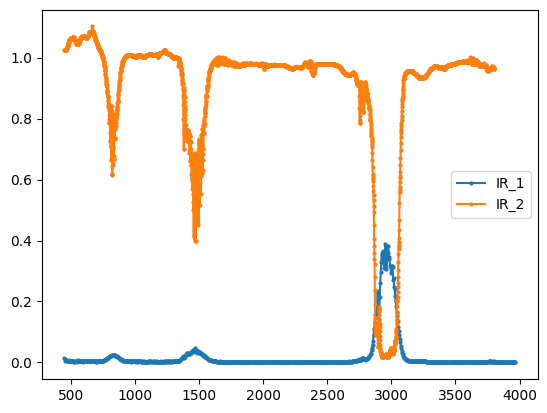

In [52]:
fig, ax = plt.subplots()
ax.plot(spec1_1['x'],spec1_1['y'],'-o',markersize=2.,label='IR_1')
ax.plot(spec1_2['x'],spec1_2['y'],'-o',markersize=2.,label='IR_2')
ax.legend()

<font color = 'red'> Use this text box to describe any trends you see along the series. A few sentences is fine.

##### <font color = 'red'> Series 2: methane, ethane, propane, butane, pentane </font>

In [ ]:
# Use this code (and add as many extra code cells as you want in this section) to do the above task.

<font color = 'red'> Use this text box to describe any trends you see along the series. A few sentences is fine.

##### <font color = 'red'> Series 3: cyclopropane, cyclobutane, cyclopentane, cyclohexane, benzene </font>

In [ ]:
# Use this code (and add as many extra code cells as you want in this section) to do the above task.

<font color = 'red'> Use this text box to describe any trends you see along the series. A few sentences is fine.

### Polymer Sorting for Recycling
You can find data for this exercise at https://github.com/usnistgov/nir_corr_po . The accompanying publication (which is cool) can be found at https://doi.org/10.1021/acs.macromol.3c02290 . It is not necessary to read, but it may provide some context for your qualitative answers.  
The following two exercises ask you to comment on the reproducibility of the measurements. Since we have not gone over any quantification principles in class yet, these may be purely qualitative for full credit.

##### <font color='red'> Assess the reproducibility of the measurement. </font>
Pick a single polymer (same code (e.g. H0002)) and plot the 6 NIR spectra collected on a single axis. Comment on the qualitative reproducibility of the measurement.

In [ ]:
# code here; insert as many cells as you need

<font color = red> Qualitative answer in this text box.

##### <font color='red'> Assess the uniformity of a single polymer's NIR spectrum between different suppliers. </font>
Plot the data from each type of LDPE on the same axis - sample codes S0081, S0024, N1476, N1473, and H0002. Comment on the qualitative agreement between spectra and if it would be easy to use these to identify LDPE in a mixed recycling stream.

In [ ]:
# code here; insert as many cells as you need

<font color = 'red'> Qualitative answer in this box.

## Part 2: Reflecting on FAIR Data principles.
No code!

## Part 3: Case study - an OFET database
No code!